In [37]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# Look at the headers for the Measurement table so we know which to extract from.
meas_headers = session.query(Measurement).first()
meas_headers.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2ab936a49a0>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [5]:
# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# Perform the query to extract date and temperature where the month is equal to 6 (June).
session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date) == 6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
# 2. Convert the June temperatures to a list.
# No longer need the date, so extract just temperatures and save to june_temps.
june_temps = session.query(Measurement.tobs).filter(extract("month", Measurement.date) == 6).all()
june_temps

[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [7]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=["June Temp. (°F)"])
june_temps_df.head()

,June Temp. (°F)
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [8]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temp. (°F)
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


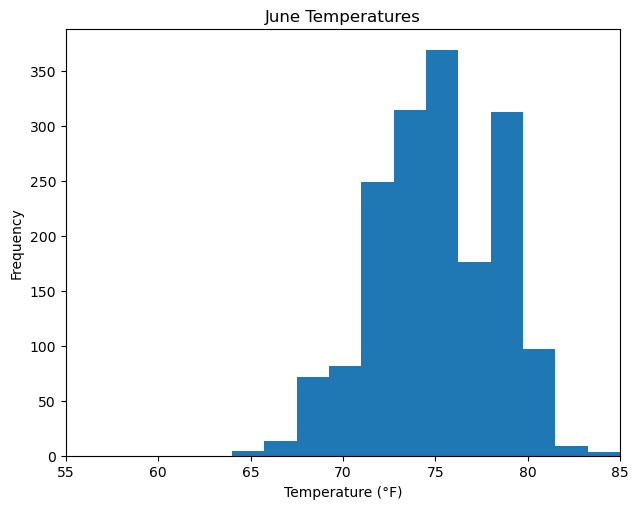

In [72]:
# Plot histogram of temperatures in June
june_temps_df.plot.hist(bins=12)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlabel('Temperature (°F)')
plt.xlim([55, 85])
plt.legend('', frameon=False)

In [70]:
# Calculate summary statistics for precipitation in June.
june_prcps = session.query(Measurement.prcp).filter(extract("month", Measurement.date) == 6).all()
june_prcps_df = pd.DataFrame(june_prcps, columns=["June Precip."])
june_prcps_df.describe()

,June Precip.
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


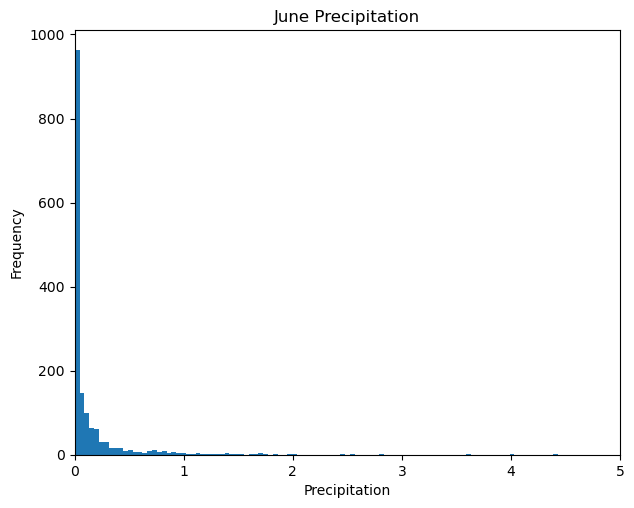

In [73]:
# Plot histogram of precipitation in December
june_prcps = session.query(Measurement.prcp).filter(extract("month", Measurement.date) == 6).all()
june_prcps_df = pd.DataFrame(june_prcps, columns=["June Precip."])
june_prcps_df.plot.hist(bins=100)
plt.tight_layout()
plt.title('June Precipitation')
plt.xlabel('Precipitation')
plt.xlim([0, 5])
plt.legend('', frameon=False)

In [9]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# Perform the query to extract date and temperature where the month is equal to 6 (December).
session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date) == 12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [11]:
# 7. Convert the December temperatures to a list.
# No longer need the date, so extract just temperatures and save to june_temps.
dec_temps = session.query(Measurement.tobs).filter(extract("month", Measurement.date) == 12).all()
dec_temps

[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=["Dec. Temp. (°F)"])
dec_temps_df.head()

,Dec. Temp. (°F)
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec. Temp. (°F)
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [69]:
# Calculate summary statistics for precipitation in December.
dec_prcps = session.query(Measurement.prcp).filter(extract("month", Measurement.date) == 12).all()
dec_prcps_df = pd.DataFrame(dec_prcps, columns=["Dec. Precip."])
dec_prcps_df.describe()

,Dec. Precip.
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


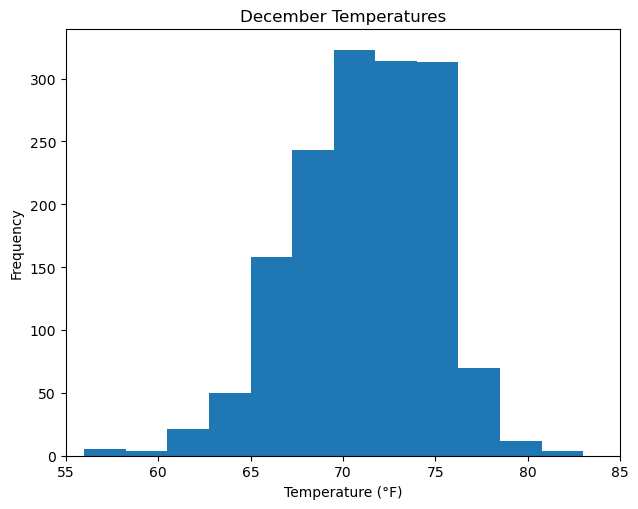

In [46]:
# Plot histogram of temperatures in December
dec_temps_df.plot.hist(bins=12)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlabel('Temperature (°F)')
plt.xlim([55, 85])
plt.legend('', frameon=False)

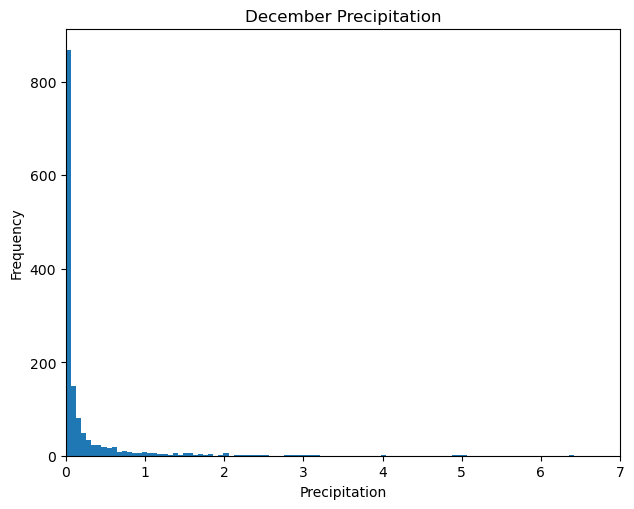

In [64]:
# Plot histogram of precipitation in December
dec_prcps = session.query(Measurement.prcp).filter(extract("month", Measurement.date) == 12).all()
dec_prcps_df = pd.DataFrame(dec_prcps, columns=["Dec. Precip."])
dec_prcps_df.plot.hist(bins=100)
plt.tight_layout()
plt.title('December Precipitation')
plt.xlabel('Precipitation')
plt.xlim([0, 7])
plt.legend('', frameon=False)

In [14]:
# 10. Return to your challenge instructions to compare your summary statistics

<AxesSubplot:xlabel='Year', ylabel='Avg. June Temp (°F)'>

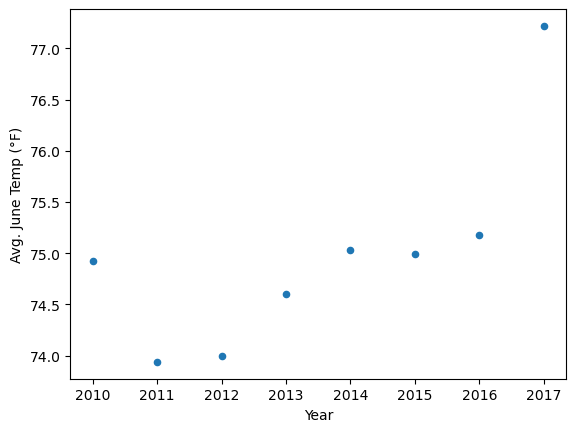

In [29]:
# Create plot with average temperature in June over the years.
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
june_temps_stats_df = pd.DataFrame()

for year in years:
    june_temps = session.query(Measurement.tobs).\
    filter(extract("month", Measurement.date) == 6).\
    filter(extract("year", Measurement.date) == year).all()
    june_temps_stats_df[str(year)] = pd.DataFrame(june_temps).describe()

avg_june_temps_df = pd.DataFrame(june_temps_stats_df.iloc[1])
avg_june_temps_df["Year"] = years
avg_june_temps_df["Avg. June Temp (°F)"] = avg_june_temps_df["mean"]
avg_june_temps_df.plot.scatter(x='Year',y='Avg. June Temp (°F)')

<AxesSubplot:xlabel='Year', ylabel='Avg. Dec. Temp (°F)'>

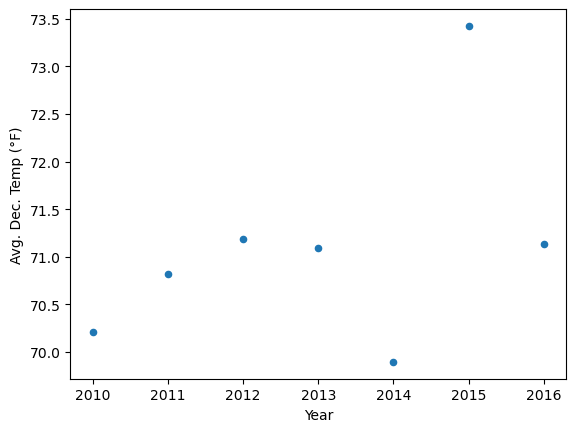

In [30]:
# Create plot with average temperature in December over the years.
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
dec_temps_stats_df = pd.DataFrame()

for year in years:
    dec_temps = session.query(Measurement.tobs).\
    filter(extract("month", Measurement.date) == 12).\
    filter(extract("year", Measurement.date) == year).all()
    dec_temps_stats_df[str(year)] = pd.DataFrame(dec_temps).describe()

avg_dec_temps_df = pd.DataFrame(dec_temps_stats_df.iloc[1])
avg_dec_temps_df["Year"] = years
avg_dec_temps_df["Avg. Dec. Temp (°F)"] = avg_dec_temps_df["mean"]
avg_dec_temps_df.plot.scatter(x='Year',y='Avg. Dec. Temp (°F)')

<AxesSubplot:xlabel='Year', ylabel='Avg. June Precip.'>

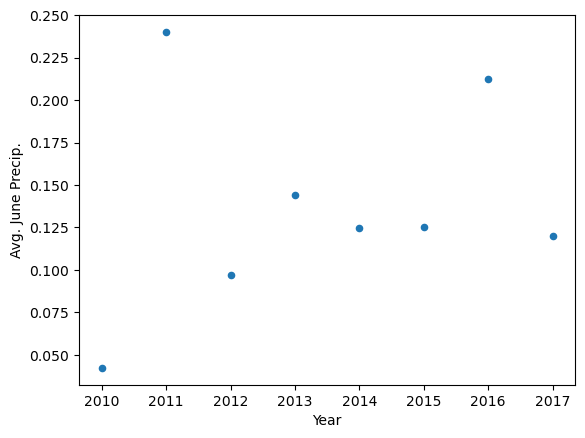

In [74]:
# Create plot with average precipitation in June over the years.
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
june_prcps_stats_df = pd.DataFrame()

for year in years:
    june_prcps = session.query(Measurement.prcp).\
    filter(extract("month", Measurement.date) == 6).\
    filter(extract("year", Measurement.date) == year).all()
    june_prcps_stats_df[str(year)] = pd.DataFrame(june_prcps).describe()

avg_june_prcps_df = pd.DataFrame(june_prcps_stats_df.iloc[1])
avg_june_prcps_df["Year"] = years
avg_june_prcps_df["Avg. June Precip."] = avg_june_prcps_df["mean"]
avg_june_prcps_df.plot.scatter(x='Year',y='Avg. June Precip.')

<AxesSubplot:xlabel='Year', ylabel='Avg. Dec. Precip.'>

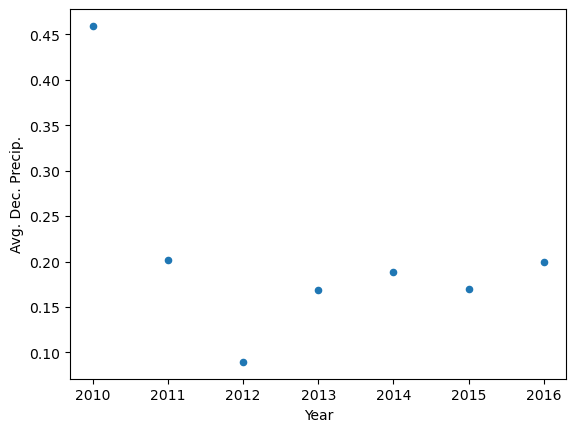

In [33]:
# Create plot with average precipitation in December over the years.
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
dec_prcps_stats_df = pd.DataFrame()

for year in years:
    dec_prcps = session.query(Measurement.prcp).\
    filter(extract("month", Measurement.date) == 12).\
    filter(extract("year", Measurement.date) == year).all()
    dec_prcps_stats_df[str(year)] = pd.DataFrame(dec_prcps).describe()

avg_dec_prcps_df = pd.DataFrame(dec_prcps_stats_df.iloc[1])
avg_dec_prcps_df["Year"] = years
avg_dec_prcps_df["Avg. Dec. Precip."] = avg_dec_prcps_df["mean"]
avg_dec_prcps_df.plot.scatter(x='Year',y='Avg. Dec. Precip.')